In [108]:
#importing the necessary libraries
import pandas as pd
import numpy as np
import matplotlib
import sqlite3
import matplotlib.pyplot as plt
import json
import pickle
import seaborn as sns

In [2]:
# Reading the csv and the tvs, there was ont that was need to put one enconding
bom_movie_gross = pd.read_csv('data/bom.movie_gross.csv')
rt_movie_info = pd.read_csv('data/rt.movie_info.tsv', delimiter = '\t')
rt_reviews = pd.read_csv('data/rt.reviews.tsv', delimiter = '\t', encoding='ISO-8859-1')
tmdb_movies = pd.read_csv('data/tmdb.movies.csv')
tn_movie_budgets = pd.read_csv('data/tn.movie_budgets.csv')


In [7]:
con = sqlite3.connect('data/im.db')
cursor_obj = con.cursor()

In [8]:
%%bash


sqlite3 data/im.db
.schema

CREATE TABLE IF NOT EXISTS "movie_basics" (
"movie_id" TEXT,
  "primary_title" TEXT,
  "original_title" TEXT,
  "start_year" INTEGER,
  "runtime_minutes" REAL,
  "genres" TEXT
);
CREATE TABLE IF NOT EXISTS "directors" (
"movie_id" TEXT,
  "person_id" TEXT
);
CREATE TABLE IF NOT EXISTS "known_for" (
"person_id" TEXT,
  "movie_id" TEXT
);
CREATE TABLE IF NOT EXISTS "movie_akas" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "title" TEXT,
  "region" TEXT,
  "language" TEXT,
  "types" TEXT,
  "attributes" TEXT,
  "is_original_title" REAL
);
CREATE TABLE IF NOT EXISTS "movie_ratings" (
"movie_id" TEXT,
  "averagerating" REAL,
  "numvotes" INTEGER
);
CREATE TABLE IF NOT EXISTS "persons" (
"person_id" TEXT,
  "primary_name" TEXT,
  "birth_year" REAL,
  "death_year" REAL,
  "primary_profession" TEXT
);
CREATE TABLE IF NOT EXISTS "principals" (
"movie_id" TEXT,
  "ordering" INTEGER,
  "person_id" TEXT,
  "category" TEXT,
  "job" TEXT,
  "characters" TEXT
);
CREATE TABLE IF NOT EXISTS "writers" (
"m

In [9]:
%%bash


sqlite3 data/im.db
.tables



directors      movie_akas     movie_ratings  principals   
known_for      movie_basics   persons        writers      


In [10]:
#creating the queries movies
qr_movie_basics = 'SELECT A.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres FROM movie_basics A , movie_akas B WHERE A.movie_id=B.movie_id'
qr_movie_akas = 'SELECT B.movie_id, B.title, B.region, B.language, B.types, B.attributes, B.is_original_title, A.primary_title, A.original_title, A.start_year, A.runtime_minutes, A.genres, C.averagerating, C.numvotes FROM movie_akas B, movie_basics A, movie_ratings C WHERE B.movie_id=A.movie_id and B.movie_id=C.movie_id' #
qr_movie_ratings = 'SELECT C.movie_id, C.averagerating, C.numvotes FROM movie_ratings C, movie_basics A WHERE C.movie_id=A.movie_id' #

In [11]:
#upload the tables with data movies
tb_movie_basics = pd.read_sql(qr_movie_basics,con)
tb_movie_akas = pd.read_sql(qr_movie_akas,con)
tb_movie_ratings = pd.read_sql(qr_movie_ratings,con)

In [12]:
#creating the queries person
qr_persons = 'SELECT * FROM persons' # DONE
qr_directors = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM directors A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #
qr_writers = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM writers A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id'
qr_known_for = 'SELECT A.movie_id, A.person_id, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM known_for A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE
qr_principals = 'SELECT A.movie_id, A.person_id, A.category, A.job, A.characters, B.primary_name, B.birth_year, B.death_year, B.primary_profession, D.title, D.region, D.language, D.types, D.attributes, D.is_original_title, E.primary_title, E.original_title, E.start_year, E.runtime_minutes, E.genres, C.averagerating, C.numvotes FROM principals A, persons B, movie_ratings C, movie_akas D, movie_basics E WHERE A.person_id=B.person_id  AND A.movie_id=D.movie_id AND C.movie_id=D.movie_id AND E.movie_id=D.movie_id' #DONE

In [13]:
#upload the tables with data person
tb_persons = pd.read_sql(qr_persons,con)
tb_directors = pd.read_sql(qr_directors,con)
tb_writers = pd.read_sql(qr_writers,con)
tb_principals = pd.read_sql(qr_principals,con)
tb_known_for = pd.read_sql(qr_known_for,con)

In [14]:
#spliting genres at persons table
tb_writers['genres_split'] = tb_writers['genres'].str.split(",")
tb_directors['genres_split'] = tb_directors['genres'].str.split(",")
tb_principals['genres_split'] = tb_principals['genres'].str.split(",")
tb_known_for['genres_split'] = tb_known_for['genres'].str.split(",")

In [15]:
#spliting primary pofession at persons table
tb_writers['primary_profession_split'] = tb_writers['primary_profession'].str.split(",")
tb_directors['primary_profession_split'] = tb_directors['primary_profession'].str.split(",")
tb_principals['primary_profession_split'] = tb_principals['primary_profession'].str.split(",")
tb_known_for['primary_profession_split'] = tb_known_for['primary_profession'].str.split(",")

In [16]:
#spliting genres at movies table
tb_movie_akas['genres_split'] = tb_movie_akas['genres'].str.split(",")
tb_movie_basics['genres_split'] = tb_movie_basics['genres'].str.split(",")

In [17]:
# separating the genres and primary at person table
tb_writers_tot = tb_writers.explode('genres_split')
tb_directors_tot = tb_directors.explode('genres_split')
tb_principals_tot = tb_principals.explode('genres_split')
tb_known_for_tot = tb_known_for.explode('genres_split')
tb_writers_tot = tb_writers_tot.explode('primary_profession_split')
tb_directors_tot = tb_directors_tot.explode('primary_profession_split')
tb_principals_tot = tb_principals_tot.explode('primary_profession_split')
tb_known_for_tot = tb_known_for_tot.explode('primary_profession_split')

In [18]:
# separating the genres at movies table
tb_movies_tot = tb_movie_akas.explode('genres_split')

In [ ]:
cat_cols =  ['primary_profession','region','language','types','attributes','genres','genres_split','primary_profession_split']

tb_writers_tot[cat_cols] = \
tb_writers_tot[cat_cols].astype('category')
tb_directors_tot[cat_cols] = \
tb_directors_tot[cat_cols].astype('category')
tb_principals_tot[cat_cols] = \
tb_principals_tot[cat_cols].astype('category')
tb_known_for_tot[cat_cols] = \
tb_known_for_tot[cat_cols].astype('category')

#Do Not Run This!!! This is where everything gets funked

#Creating the field all titles
tb_writers_tot['all_titles'] = list(tb_writers_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_directors_tot['all_titles'] = list(tb_directors_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_principals_tot['all_titles'] = list(tb_principals_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_known_for_tot['all_titles'] = list(tb_known_for_tot.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_movie_akas['all_titles'] = list(tb_movie_akas.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))
tb_movie_basics['all_titles'] = list(tb_movie_basics.groupby(['movie_id'])['title'].transform(lambda x: '^*^'.join(x)))

In [24]:
tb_movie_akas

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split
0,tt0369610,Джурасик свят,BG,bg,None,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]"
1,tt0369610,Jurashikku warudo,JP,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]"
2,tt0369610,Jurassic World: O Mundo dos Dinossauros,BR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]"
3,tt0369610,O Mundo dos Dinossauros,BR,None,None,short title,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]"
4,tt0369610,Jurassic World,FR,None,imdbDisplay,None,0.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261801,tt9726638,Monkey King: The Volcano,None,None,original,None,1.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,"[Action, Adventure, Comedy]"
261802,tt9726638,Qi Tian Da Sheng Huo Yan Shan,CN,yue,imdbDisplay,None,0.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,"[Action, Adventure, Comedy]"
261803,tt9827784,Sayonara kuchibiru,JP,None,None,None,0.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,"[Music, Romance]"
261804,tt9827784,Sayonara kuchibiru,None,None,original,None,1.0,Farewell Song,Sayonara kuchibiru,2019,116.0,"Music,Romance",7.7,6,"[Music, Romance]"


In [25]:
tb_movie_akas['all_titles'] = tb_movie_akas.groupby(['movie_id'])['title'].transform(lambda x: '|'.join(x))

In [32]:
tb_movie_akas_tot = tb_movie_akas()

Index(['movie_id', 'title', 'region', 'language', 'types', 'attributes',
       'is_original_title', 'primary_title', 'original_title', 'start_year',
       'runtime_minutes', 'genres', 'averagerating', 'numvotes',
       'genres_split', 'all_titles'],
      dtype='object')

In [41]:
tb_movie_akas_tot = tb_movie_akas[tb_movie_akas['is_original_title'] == 1]

In [51]:
tb_movie_akas['all_titles_split'] = tb_movie_akas['all_titles'].str.split("|")
##come back and map this

In [52]:
tb_movie_akas_tot

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split,all_titles,all_titles_split
38,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015,124.0,"Action,Adventure,Sci-Fi",7.0,539338,"[Action, Adventure, Sci-Fi]",Джурасик свят|Jurashikku warudo|Jurassic World...,"[Джурасик свят, Jurashikku warudo, Jurassic Wo..."
80,tt0401729,John Carter,None,None,original,None,1.0,John Carter,John Carter,2012,132.0,"Action,Adventure,Sci-Fi",6.6,241792,"[Action, Adventure, Sci-Fi]",Джон Картер: Мiж двох свiтiв|John Carter of Ma...,"[Джон Картер: Мiж двох свiтiв, John Carter of ..."
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,None,None,original,None,1.0,Versailles Rediscovered - The Sun King's Vanis...,Versailles Rediscovered - The Sun King's Vanis...,2019,52.0,Documentary,7.0,5,[Documentary],Versailles Rediscovered - The Sun King's Vanis...,[Versailles Rediscovered - The Sun King's Vani...
120,tt1014759,Alice in Wonderland,None,None,original,None,1.0,Alice in Wonderland,Alice in Wonderland,2010,108.0,"Adventure,Family,Fantasy",6.5,358813,"[Adventure, Family, Fantasy]",Alice Dar Sarzamin E Ajayeb|Η Αλίκη στη χώρα τ...,"[Alice Dar Sarzamin E Ajayeb, Η Αλίκη στη χώρα..."
152,tt1179034,From Paris with Love,None,None,original,None,1.0,From Paris with Love,From Paris with Love,2010,92.0,"Action,Crime,Thriller",6.5,107079,"[Action, Crime, Thriller]",Armastusega Pariisist|Dupla Implacável|París e...,"[Armastusega Pariisist, Dupla Implacável, Parí..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
261793,tt9644084,Der Atem,None,None,original,None,1.0,Der Atem,Der Atem,2019,95.0,Documentary,5.2,5,[Documentary],Der Atem|Der Atem|The Breath,"[Der Atem, Der Atem, The Breath]"
261797,tt9657946,Querência,None,None,original,None,1.0,Homing,Querência,2019,90.0,Drama,6.0,16,[Drama],Homing|Querência|Querência,"[Homing, Querência, Querência]"
261799,tt9723084,Anderswo. Allein in Afrika,None,None,original,None,1.0,Anderswo. Allein in Afrika,Anderswo. Allein in Afrika,2018,103.0,"Adventure,Documentary",6.7,35,"[Adventure, Documentary]",Anderswo. Allein in Afrika|Anderswo. Allein in...,"[Anderswo. Allein in Afrika, Anderswo. Allein ..."
261801,tt9726638,Monkey King: The Volcano,None,None,original,None,1.0,Monkey King: The Volcano,Monkey King: The Volcano,2019,90.0,"Action,Adventure,Comedy",6.0,6,"[Action, Adventure, Comedy]",Qi Tian Da Sheng 2|Monkey King: The Volcano|Qi...,"[Qi Tian Da Sheng 2, Monkey King: The Volcano,..."


In [53]:
from copy import deepcopy

In [54]:
movie_akas = deepcopy(tb_movie_akas_tot)

In [57]:
movie_akas.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 36895 entries, 38 to 261804
Data columns (total 17 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   movie_id           36895 non-null  object 
 1   title              36895 non-null  object 
 2   region             6 non-null      object 
 3   language           4 non-null      object 
 4   types              36895 non-null  object 
 5   attributes         0 non-null      object 
 6   is_original_title  36895 non-null  float64
 7   primary_title      36895 non-null  object 
 8   original_title     36895 non-null  object 
 9   start_year         36895 non-null  int64  
 10  runtime_minutes    34982 non-null  float64
 11  genres             36685 non-null  object 
 12  averagerating      36895 non-null  float64
 13  numvotes           36895 non-null  int64  
 14  genres_split       36685 non-null  object 
 15  all_titles         36895 non-null  object 
 16  all_titles_split   3

In [58]:
tn_movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [73]:
movie_akas['all_titles_split']

38        [Джурасик свят, Jurashikku warudo, Jurassic Wo...
80        [Джон Картер: Мiж двох свiтiв, John Carter of ...
83        [Versailles Rediscovered - The Sun King's Vani...
120       [Alice Dar Sarzamin E Ajayeb, Η Αλίκη στη χώρα...
152       [Armastusega Pariisist, Dupla Implacável, Parí...
                                ...                        
261793                     [Der Atem, Der Atem, The Breath]
261797                       [Homing, Querência, Querência]
261799    [Anderswo. Allein in Afrika, Anderswo. Allein ...
261801    [Qi Tian Da Sheng 2, Monkey King: The Volcano,...
261804    [Sayonara kuchibiru, Sayonara kuchibiru, Farew...
Name: all_titles_split, Length: 36895, dtype: object

In [78]:


tn_movie_budgets.columns

Index(['id', 'release_date', 'movie', 'production_budget', 'domestic_gross',
       'worldwide_gross'],
      dtype='object')

In [81]:

for index,movie in enumerate(tn_movie_budgets['movie']):
    for idx, aka in enumerate(movie_akas['all_titles_split']):
        if movie in aka:
            movie_akas.loc[idx,'budget'] = tn_movie_budgets.loc[index, 'production_budget']
#             movie_akas.loc[idx, 'domestic_gross'] = tn_movie_budgets.loc[index, 'domestic_gross']
#             movie_akas.loc[idx, 'worldwide_gross'] = tn_movie_budgets.loc[index, 'worldwide_gross']
        else: 
            movie_akas.loc[idx,'budget'] = np.nan
            
         
    
        

TypeError: argument of type 'float' is not iterable

In [82]:
movie_akas

,movie_id,title,region,language,types,attributes,is_original_title,primary_title,original_title,start_year,runtime_minutes,genres,averagerating,numvotes,genres_split,all_titles,all_titles_split,budget,domestic_gross,worldwide_gross
38,tt0369610,Jurassic World,None,None,original,None,1.0,Jurassic World,Jurassic World,2015.0,124.0,"Action,Adventure,Sci-Fi",7.0,539338.0,"[Action, Adventure, Sci-Fi]",Джурасик свят|Jurashikku warudo|Jurassic World...,"[Джурасик свят, Jurashikku warudo, Jurassic Wo...",NaN,NaN,NaN
80,tt0401729,John Carter,None,None,original,None,1.0,John Carter,John Carter,2012.0,132.0,"Action,Adventure,Sci-Fi",6.6,241792.0,"[Action, Adventure, Sci-Fi]",Джон Картер: Мiж двох свiтiв|John Carter of Ma...,"[Джон Картер: Мiж двох свiтiв, John Carter of ...",NaN,NaN,NaN
83,tt10010134,Versailles Rediscovered - The Sun King's Vanis...,None,None,original,None,1.0,Versailles Rediscovered - The Sun King's Vanis...,Versailles Rediscovered - The Sun King's Vanis...,2019.0,52.0,Documentary,7.0,5.0,[Documentary],Versailles Rediscovered - The Sun King's Vanis...,[Versailles Rediscovered - The Sun King's Vani...,NaN,NaN,NaN
120,tt1014759,Alice in Wonderland,None,None,original,None,1.0,Alice in Wonderland,Alice in Wonderland,2010.0,108.0,"Adventure,Family,Fantasy",6.5,358813.0,"[Adventure, Family, Fantasy]",Alice Dar Sarzamin E Ajayeb|Η Αλίκη στη χώρα τ...,"[Alice Dar Sarzamin E Ajayeb, Η Αλίκη στη χώρα...",NaN,NaN,NaN
152,tt1179034,From Paris with Love,None,None,original,None,1.0,From Paris with Love,From Paris with Love,2010.0,92.0,"Action,Crime,Thriller",6.5,107079.0,"[Action, Crime, Thriller]",Armastusega Pariisist|Dupla Implacável|París e...,"[Armastusega Pariisist, Dupla Implacável, Parí...",NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
36888,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36890,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
36893,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [83]:
tb_movie_akas['all_titles_split']

0         [Джурасик свят, Jurashikku warudo, Jurassic Wo...
1         [Джурасик свят, Jurashikku warudo, Jurassic Wo...
2         [Джурасик свят, Jurashikku warudo, Jurassic Wo...
3         [Джурасик свят, Jurashikku warudo, Jurassic Wo...
4         [Джурасик свят, Jurashikku warudo, Jurassic Wo...
                                ...                        
261801    [Qi Tian Da Sheng 2, Monkey King: The Volcano,...
261802    [Qi Tian Da Sheng 2, Monkey King: The Volcano,...
261803    [Sayonara kuchibiru, Sayonara kuchibiru, Farew...
261804    [Sayonara kuchibiru, Sayonara kuchibiru, Farew...
261805    [Sayonara kuchibiru, Sayonara kuchibiru, Farew...
Name: all_titles_split, Length: 261806, dtype: object

In [ ]:
import string

In [90]:
tn_movie_budgets['movie'][7].translate(str.maketrans('', '', string.punctuation))

'Pirates of the Caribbean At Worldâ\x80\x99s End'

In [91]:
tn_movie_budgets['movie'].head(30)

0                                               Avatar
1          Pirates of the Caribbean: On Stranger Tides
2                                         Dark Phoenix
3                              Avengers: Age of Ultron
4                    Star Wars Ep. VIII: The Last Jedi
5                 Star Wars Ep. VII: The Force Awakens
6                               Avengers: Infinity War
7           Pirates of the Caribbean: At Worldâs End
8                                       Justice League
9                                              Spectre
10                               The Dark Knight Rises
11                             Solo: A Star Wars Story
12                                     The Lone Ranger
13                                         John Carter
14                                             Tangled
15                                        Spider-Man 3
16                          Captain America: Civil War
17                  Batman v Superman: Dawn of Justice
18        

In [92]:
tn_movie_budgets['movie'][7]

'Pirates of the Caribbean: At Worldâ\x80\x99s End'

In [85]:
new_string

['Джурасик свят',
 'Jurashikku warudo',
 'Jurassic World: O Mundo dos Dinossauros',
 'O Mundo dos Dinossauros',
 'Jurassic World',
 'Jurassic World',
 'Jurassic World',
 'Jurski svijet',
 "Olam ha'Yura",
 'Jurassic World: Mundo Jurásico',
 'Jurassic World: Sauruste maailm',
 'Jurassic World',
 'Jurassic World 3D',
 'Jurassic World 3D',
 'Jurassic World 3D',
 'Juras laikmeta pasaule',
 'Mundo Jurássico',
 'Мир Юрского периода',
 'Jurský svět',
 'Monde jurassique',
 'Jurassic World',
 'Ebb Tide',
 'Jurassic World: Mundo Jurásico',
 'Jurassic World',
 'Juros periodo pasaulis',
 'Jurassic World',
 'Jurassic World: Mundo jurásico',
 'Jurassic Park 4',
 'Jurassic Park IV',
 'Jurassic World',
 'Jurski svet',
 'Свiт Юрського перiоду',
 'The Gioi Khung Long',
 'Jurassic World',
 'Svet iz doba jure',
 'Jurský svet',
 'Jurassic World',
 'Jurassic Park 4',
 'Jurassic World',
 'Jurassic World',
 'Jurassic World',
 'Park jurajski 4',
 'Yur dövrü Dünyasi',
 'Iuruli periodis samyaro',
 'Jurassic World

In [100]:
tn_movie_budgets

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"
...,...,...,...,...,...,...
5777,78,"Dec 31, 2018",Red 11,"$7,000",$0,$0
5778,79,"Apr 2, 1999",Following,"$6,000","$48,482","$240,495"
5779,80,"Jul 13, 2005",Return to the Land of Wonders,"$5,000","$1,338","$1,338"
5780,81,"Sep 29, 2015",A Plague So Pleasant,"$1,400",$0,$0


In [102]:
##Making Budgets into Numerical Values##
#Step 1
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: x.strip('$'))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: x.strip('$'))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: x.strip('$'))

#Step 2
tn_movie_budgets['production_budget'] = tn_movie_budgets['production_budget'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['domestic_gross'] = tn_movie_budgets['domestic_gross'].map(lambda x: float(x.replace(",", "")))
tn_movie_budgets['worldwide_gross'] = tn_movie_budgets['worldwide_gross'].map(lambda x: float(x.replace(",", "")))

##New Columns for Profit information
#domestic_profiit
tn_movie_budgets['domestic_profit'] = tn_movie_budgets['domestic_gross'] - tn_movie_budgets['production_budget']

#total_profit
tn_movie_budgets['total_profit'] = tn_movie_budgets['worldwide_gross'] - tn_movie_budgets['production_budget']

#roi
tn_movie_budgets['roi'] = (tn_movie_budgets['worldwide_gross']-tn_movie_budgets['production_budget'])/tn_movie_budgets['production_budget']

## Removing movies before 2010
#convert to datetime
tn_movie_budgets['release_date'] = pd.to_datetime(tn_movie_budgets['release_date'])
#set index to datetime
tn_movie_budgets.set_index('release_date', inplace=True)

#slice out our timeframe
tn_movie_budgets.sort_index().loc['01-01-2010':'12-31-2022']


,id,movie,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_profit,roi
release_date,,,,,,,,
2010-01-08,13,Youth in Revolt,18000000.0,15285588.0,19685588.0,-2714412.0,1685588.0,0.093644
2010-01-08,40,Leap Year,19000000.0,25918920.0,32618920.0,6918920.0,13618920.0,0.716785
2010-01-08,67,Daybreakers,20000000.0,30101577.0,51445503.0,10101577.0,31445503.0,1.572275
2010-01-15,68,The Spy Next Door,28000000.0,24307106.0,46752858.0,-3692894.0,18752858.0,0.669745
2010-01-15,36,Fish Tank,3000000.0,374675.0,5922292.0,-2625325.0,2922292.0,0.974097
...,...,...,...,...,...,...,...,...
2019-12-31,30,Reagan,25000000.0,0.0,0.0,-25000000.0,-25000000.0,-1.000000
2019-12-31,13,Rogue City,13000000.0,0.0,0.0,-13000000.0,-13000000.0,-1.000000
2020-02-21,36,Call of the Wild,82000000.0,0.0,0.0,-82000000.0,-82000000.0,-1.000000


In [103]:
## Remove domestic_gross 0 data

In [104]:
tn_movie_budgets.describe()

,id,production_budget,domestic_gross,worldwide_gross,domestic_profit,total_profit,roi
count,5782.000000,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5.782000e+03,5782.000000
mean,50.372363,3.158776e+07,4.187333e+07,9.148746e+07,1.028557e+07,5.989970e+07,3.800161
std,28.821076,4.181208e+07,6.824060e+07,1.747200e+08,4.992137e+07,1.460889e+08,29.530282
min,1.000000,1.100000e+03,0.000000e+00,0.000000e+00,-3.072376e+08,-2.002376e+08,-1.000000
25%,25.000000,5.000000e+06,1.429534e+06,4.125415e+06,-9.132757e+06,-2.189071e+06,-0.507704
50%,50.000000,1.700000e+07,1.722594e+07,2.798445e+07,-3.487755e+05,8.550286e+06,0.708310
75%,75.000000,4.000000e+07,5.234866e+07,9.764584e+07,1.778144e+07,6.096850e+07,2.758346
max,100.000000,4.250000e+08,9.366622e+08,2.776345e+09,6.306622e+08,2.351345e+09,1799.000000


<Axes: ylabel='production_budget'>

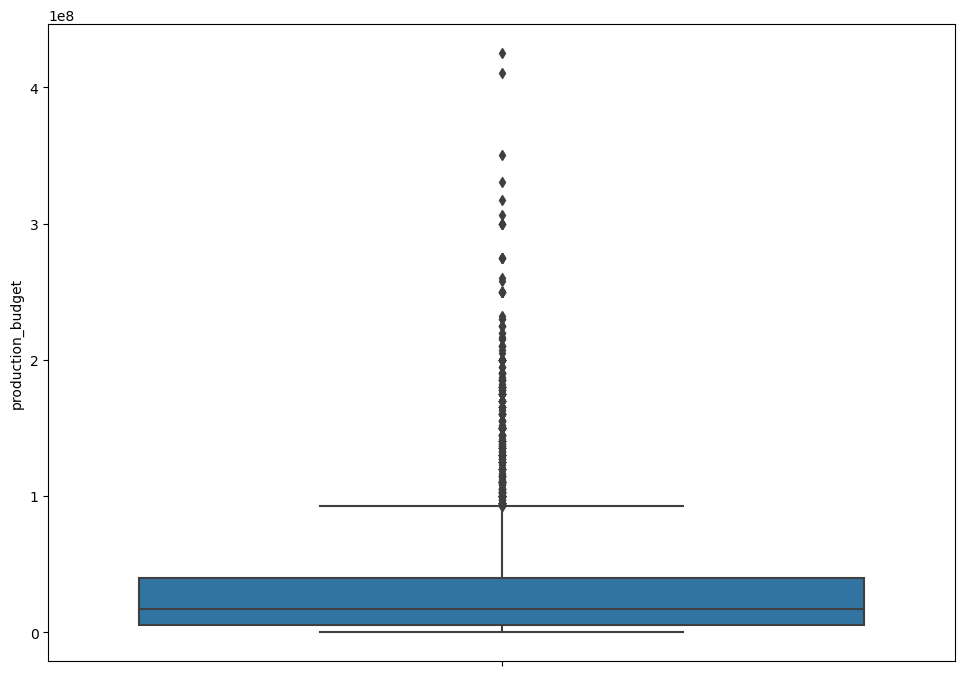

In [114]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
# sns.stripplot(y = 'production_budget', data = tn_movie_budgets, ax = ax)
sns.boxplot(y = 'production_budget', data = tn_movie_budgets, ax = ax)

# plt.show()

count: 5.782000e+03
mean: 3.158776e+07
std: 4.181208e+07
min: 1.100000e+03
25%: 5.000000e+06
50%: 1.700000e+07
75%: 75.000000
max: 4.250000e+08

In [ ]:
import numpy as np
import pandas as pd

#create data frame
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#calculate interquartile range of values in the 'points' column
q75, q25 = np.percentile(df['points'], [75 ,25])
iqr = q75 - q25

#display interquartile range 
iqr

5.75

In [ ]:
import numpy as np
import pandas as pd

#create data frame
df = pd.DataFrame({'rating': [90, 85, 82, 88, 94, 90, 76, 75, 87, 86],
                   'points': [25, 20, 14, 16, 27, 20, 12, 15, 14, 19],
                   'assists': [5, 7, 7, 8, 5, 7, 6, 9, 9, 5],
                   'rebounds': [11, 8, 10, 6, 6, 9, 6, 10, 10, 7]})

#define function to calculate interquartile range
def find_iqr(x):
  return np.subtract(*np.percentile(x, [75, 25]))

#calculate IQR for 'rating' and 'points' columns
df[['rating', 'points']].apply(find_iqr)

rating    6.75
points    5.75
dtype: float64

#calculate IQR for all columns
df.apply(find_iqr)

rating      6.75
points      5.75
assists     2.50
rebounds    3.75
dtype: float64